In [3]:
colab = False

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
if colab:
  from google.colab import drive
  drive.mount('/content/drive')
  data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/HackingToCureMichael_GENOMENON.xls')
else:
  data = pd.read_excel('data/HackingToCureMichael_GENOMENON.xls')

In [26]:
# print (data.head())

# 1.Visualization of the data from HakingToCureMichel_GENOME.xls. 
1. Number of mutations (variant_desc) per each gene (gene_symbol).
2. Number of variant type (effect_type, acmg_call) per each gene (gene_symbol).
3. Number of variant type (acmg_categories*) per each gene (gene_symbol). *meaning of abbreviation in acmg_explanations.

In [18]:
def getParameterPerGene(data, parameter, drop_duplicates=True):
  df = data[['variant_id','gene_symbol',parameter]]
  if drop_duplicates:
    df = df.drop_duplicates()
  gene_symbols = data.gene_symbol.unique()
  genes = {}
  parameter_len = {}
  for symbol in gene_symbols:
    genes[symbol] = df[df.gene_symbol == symbol]
    parameter_len[symbol] = len(genes[symbol])
  return genes, parameter_len

def barPlot (dict_data, title, xlabel, ylabel, output_path='output/img/'):
  plt.bar(range(len(dict_data)), dict_data.values(), align='center')
  plt.xticks(range(len(dict_data)), list(dict_data.keys()))
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(output_path + title +'.png', dpi=500)
  plt.savefig(output_path + title +'.svg', format='svg', dpi=1200)
  plt.show()

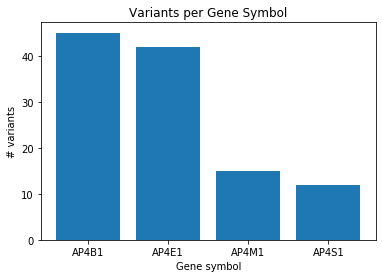

          variant_id gene_symbol variant_desc
87     ap4m1:p.C319R       AP4M1      p.C319R
88     ap4m1:p.E193K       AP4M1      p.E193K
89      ap4m1:p.G63G       AP4M1       p.G63G
90     ap4m1:p.R306X       AP4M1      p.R306X
91     ap4m1:p.R318X       AP4M1      p.R318X
92     ap4m1:p.R338X       AP4M1      p.R338X
93    ap4m1:p.R429fs       AP4M1     p.R429fs
94     ap4m1:p.R441X       AP4M1      p.R441X
95    ap4m1:p.V174fs       AP4M1     p.V174fs
96     ap4m1:p.Y65fs       AP4M1      p.Y65fs
97     ap4m1:rs13309       AP4M1      rs13309
98   ap4m1:rs1534310       AP4M1    rs1534310
99   ap4m1:rs2293479       AP4M1    rs2293479
100  ap4m1:rs4729577       AP4M1    rs4729577
101   ap4m1:rs999885       AP4M1     rs999885


In [19]:
#1. Number of mutations (variant_desc) per each gene (gene_symbol).

variant, variant_count = getParameterPerGene(data, 'variant_desc')
barPlot(dict_data = variant_count,
        title = 'Variants per Gene Symbol',
        xlabel = 'Gene symbol', 
        ylabel = '# variants')

print (variant['AP4M1'])

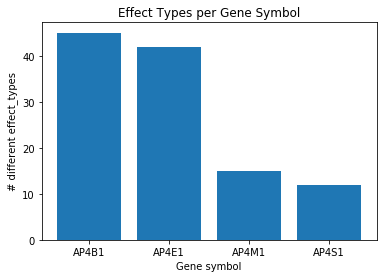

          variant_id gene_symbol          effect_type
87     ap4m1:p.C319R       AP4M1         substitution
88     ap4m1:p.E193K       AP4M1         substitution
89      ap4m1:p.G63G       AP4M1           synonymous
90     ap4m1:p.R306X       AP4M1             nonsense
91     ap4m1:p.R318X       AP4M1             nonsense
92     ap4m1:p.R338X       AP4M1             nonsense
93    ap4m1:p.R429fs       AP4M1           frameshift
94     ap4m1:p.R441X       AP4M1             nonsense
95    ap4m1:p.V174fs       AP4M1           frameshift
96     ap4m1:p.Y65fs       AP4M1           frameshift
97     ap4m1:rs13309       AP4M1  untranslated_region
98   ap4m1:rs1534310       AP4M1  untranslated_region
99   ap4m1:rs2293479       AP4M1             intronic
100  ap4m1:rs4729577       AP4M1             intronic
101   ap4m1:rs999885       AP4M1             intronic


In [20]:
# 2. Number of variant type (effect_type, acmg_call) per each gene (gene_symbol).

effect, effect_count = getParameterPerGene(data, 'effect_type')
barPlot(dict_data = effect_count, 
        title = 'Effect Types per Gene Symbol',
        xlabel = 'Gene symbol', 
        ylabel = '# different effect_types')

print (effect['AP4M1'])

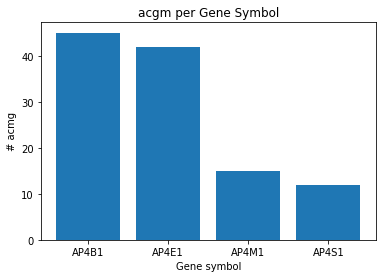

          variant_id gene_symbol          acmg_call
87     ap4m1:p.C319R       AP4M1                vus
88     ap4m1:p.E193K       AP4M1  likely_pathogenic
89      ap4m1:p.G63G       AP4M1                vus
90     ap4m1:p.R306X       AP4M1         pathogenic
91     ap4m1:p.R318X       AP4M1         pathogenic
92     ap4m1:p.R338X       AP4M1         pathogenic
93    ap4m1:p.R429fs       AP4M1  likely_pathogenic
94     ap4m1:p.R441X       AP4M1  likely_pathogenic
95    ap4m1:p.V174fs       AP4M1         pathogenic
96     ap4m1:p.Y65fs       AP4M1         pathogenic
97     ap4m1:rs13309       AP4M1             benign
98   ap4m1:rs1534310       AP4M1             benign
99   ap4m1:rs2293479       AP4M1             benign
100  ap4m1:rs4729577       AP4M1             benign
101   ap4m1:rs999885       AP4M1             benign


In [21]:
# 2. Number of variant type (effect_type, acmg_call) per each gene (gene_symbol).

acmg, acmg_count = getParameterPerGene(data, 'acmg_call')
barPlot(dict_data = acmg_count, 
        title = 'acgm per Gene Symbol',
        xlabel = 'Gene symbol', 
        ylabel = '# acmg')
print (acmg['AP4M1'])

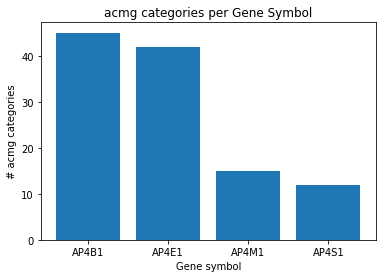

          variant_id gene_symbol                acmg_categories
87     ap4m1:p.C319R       AP4M1                  pm2, pp1, pp2
88     ap4m1:p.E193K       AP4M1            ps4m, pm2, pp2, ppc
89      ap4m1:p.G63G       AP4M1              pm2, ppc_het, bp7
90     ap4m1:p.R306X       AP4M1                 pvs1, pm2, pp1
91     ap4m1:p.R318X       AP4M1  pvs1, pm2, pp1, ppc, ppc_homo
92     ap4m1:p.R338X       AP4M1            pvs1, pm2, pp1, ppc
93    ap4m1:p.R429fs       AP4M1                      pvs1, pm2
94     ap4m1:p.R441X       AP4M1                      pvs1, pm2
95    ap4m1:p.V174fs       AP4M1                 pvs1, pm2, pp1
96     ap4m1:p.Y65fs       AP4M1            pvs1, pm2, pp1, ppc
97     ap4m1:rs13309       AP4M1                       bs1, ba1
98   ap4m1:rs1534310       AP4M1                       bs1, ba1
99   ap4m1:rs2293479       AP4M1                       bs1, ba1
100  ap4m1:rs4729577       AP4M1                       bs1, ba1
101   ap4m1:rs999885       AP4M1        

In [28]:
# 3. Number of variant type (acmg_categories*) per each gene (gene_symbol). 
# *meaning of abbreviation in acmg_explanations.

acmg_cat, acmg_cat_count = getParameterPerGene(data, 'acmg_categories')
barPlot(dict_data = acmg_cat_count, 
        title = 'acmg categories per Gene Symbol',
        xlabel = 'Gene symbol', 
        ylabel = '# acmg categories')
print (acmg_cat['AP4M1'])

In [29]:
gnomad_alleles, gnomad_alleles_count = getParameterPerGene(data, 'gnomad_alleles')
print (gnomad_alleles['AP4M1'])

          variant_id gene_symbol                  gnomad_alleles
87     ap4m1:p.C319R       AP4M1                  7-99703607-T-C
88     ap4m1:p.E193K       AP4M1                             NaN
89      ap4m1:p.G63G       AP4M1                  7-99700339-C-T
90     ap4m1:p.R306X       AP4M1                  7-99703149-C-T
91     ap4m1:p.R318X       AP4M1                  7-99703604-C-T
92     ap4m1:p.R338X       AP4M1                  7-99703901-C-T
93    ap4m1:p.R429fs       AP4M1                             NaN
94     ap4m1:p.R441X       AP4M1                  7-99704464-C-T
95    ap4m1:p.V174fs       AP4M1             7-99701284-G-GCCGCC
96     ap4m1:p.Y65fs       AP4M1                7-99700338-GCC-G
97     ap4m1:rs13309       AP4M1                  7-99704796-A-T
98   ap4m1:rs1534310       AP4M1                  7-99699169-A-T
99   ap4m1:rs2293479       AP4M1  7-99703958-T-C\n7-99703958-T-G
100  ap4m1:rs4729577       AP4M1                  7-99701640-T-C
101   ap4m1:rs999885     

In [30]:
literature_alleles, literature_alleles_count = getParameterPerGene(data, 'literature_alleles')
print (literature_alleles['AP4M1'])

          variant_id gene_symbol              literature_alleles
87     ap4m1:p.C319R       AP4M1                  7-99703607-T-C
88     ap4m1:p.E193K       AP4M1                             NaN
89      ap4m1:p.G63G       AP4M1                  7-99700339-C-T
90     ap4m1:p.R306X       AP4M1                  7-99703149-C-T
91     ap4m1:p.R318X       AP4M1                  7-99703604-C-T
92     ap4m1:p.R338X       AP4M1                  7-99703901-C-T
93    ap4m1:p.R429fs       AP4M1                 7-99704428-AG-A
94     ap4m1:p.R441X       AP4M1                  7-99704464-C-T
95    ap4m1:p.V174fs       AP4M1                             NaN
96     ap4m1:p.Y65fs       AP4M1                7-99700342-CTA-C
97     ap4m1:rs13309       AP4M1                  7-99704796-A-T
98   ap4m1:rs1534310       AP4M1                  7-99699169-A-T
99   ap4m1:rs2293479       AP4M1  7-99703958-T-C\n7-99703958-T-G
100  ap4m1:rs4729577       AP4M1                  7-99701640-T-C
101   ap4m1:rs999885     

In [31]:
csv_path = 'output/csv/'
effect['AP4M1'].to_csv(csv_path + 'effect.csv')
variant['AP4M1'].to_csv(csv_path + 'variant.csv')
literature_alleles['AP4M1'].to_csv(csv_path + 'literature_alleles.csv')
gnomad_alleles['AP4M1'].to_csv(csv_path + 'gnomad_alleles.csv')
acmg_cat['AP4M1'].to_csv(csv_path + 'acmg.csv')